In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Web Scrapping**

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer':'https://www.amazon.in/mCaffeine-Exfoliating-Removal-Soft-Smooth-Bathing/dp/B07K4BFQK1/ref=sr_1_7?crid=2TUY9B5WUP4Y1&keywords=mcaffeine%2Bbody%2Bscrub&qid=1699362114&sprefix=mcaffine%2Caps%2C277&sr=8-7&th=1',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [3]:
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [4]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [6]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/mCaffeine-Exfoliating-Removal-Soft-Smooth-Bathing/dp/B07K4BFQK1/ref=sr_1_7?crid=2TUY9B5WUP4Y1&keywords=mcaffeine%2Bbody%2Bscrub&qid=1699362114&sprefix=mcaffine%2Caps%2C277&sr=8-7&th=1')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-6-6b1abdf7f232>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(160)):


  0%|          | 0/160 [00:00<?, ?it/s]

In [7]:
DF = pd.DataFrame(reviewlist)
DF

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nAmazing product!!,5.0,The scrub actually provides a smooth texture a...,Reviewed in India on 12 December 2023
1,5.0 out of 5 stars\nCool but not for sensitive...,5.0,Best for men as it is hard and not for sensiti...,Reviewed in India on 22 December 2023
2,5.0 out of 5 stars\nUse full,5.0,Very good product ....in reasonable price...\n...,Reviewed in India on 14 December 2023
3,5.0 out of 5 stars\nvery good,5.0,very good for removing tan and dead skin Exfol...,Reviewed in India on 1 December 2023
4,5.0 out of 5 stars\nAwsm,5.0,Highly recommended product\nRead more,Reviewed in India on 3 December 2023
...,...,...,...,...
1275,5.0 out of 5 stars\nvery good,5.0,very good for removing tan and dead skin Exfol...,Reviewed in India on 1 December 2023
1276,5.0 out of 5 stars\nAwsm,5.0,Highly recommended product\nRead more,Reviewed in India on 3 December 2023
1277,5.0 out of 5 stars\nMakes your skin silky smooth,5.0,I absolutely love this product. I regularly bu...,Reviewed in India on 4 November 2023
1278,5.0 out of 5 stars\nWorth it,5.0,The product was very good quality and I would ...,Reviewed in India on 29 October 2023


In [8]:
DF["Review_Date"] = DF["Review_Date"].replace('Reviewed in India on','', regex=True)

In [9]:
DF.head(10)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nAmazing product!!,5.0,The scrub actually provides a smooth texture a...,12 December 2023
1,5.0 out of 5 stars\nCool but not for sensitive...,5.0,Best for men as it is hard and not for sensiti...,22 December 2023
2,5.0 out of 5 stars\nUse full,5.0,Very good product ....in reasonable price...\n...,14 December 2023
3,5.0 out of 5 stars\nvery good,5.0,very good for removing tan and dead skin Exfol...,1 December 2023
4,5.0 out of 5 stars\nAwsm,5.0,Highly recommended product\nRead more,3 December 2023
5,5.0 out of 5 stars\nMakes your skin silky smooth,5.0,I absolutely love this product. I regularly bu...,4 November 2023
6,5.0 out of 5 stars\nWorth it,5.0,The product was very good quality and I would ...,29 October 2023
7,3.0 out of 5 stars\nSmells good ..skins feels ...,3.0,Smells good... exfoliated my skin ..shows resu...,29 October 2023
8,5.0 out of 5 stars\nAmazing product!!,5.0,The scrub actually provides a smooth texture a...,12 December 2023
9,5.0 out of 5 stars\nCool but not for sensitive...,5.0,Best for men as it is hard and not for sensiti...,22 December 2023


In [10]:
DF.to_csv("Mcaffine_scrub_Review.csv")


In [11]:
#Load Dataset
Reviews = pd.read_csv('Mcaffine_scrub_Review.csv')
Reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
Reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nAmazing product!!,5.0,The scrub actually provides a smooth texture a...,12 December 2023
1,5.0 out of 5 stars\nCool but not for sensitive...,5.0,Best for men as it is hard and not for sensiti...,22 December 2023
2,5.0 out of 5 stars\nUse full,5.0,Very good product ....in reasonable price...\n...,14 December 2023
3,5.0 out of 5 stars\nvery good,5.0,very good for removing tan and dead skin Exfol...,1 December 2023
4,5.0 out of 5 stars\nAwsm,5.0,Highly recommended product\nRead more,3 December 2023
...,...,...,...,...
1275,5.0 out of 5 stars\nvery good,5.0,very good for removing tan and dead skin Exfol...,1 December 2023
1276,5.0 out of 5 stars\nAwsm,5.0,Highly recommended product\nRead more,3 December 2023
1277,5.0 out of 5 stars\nMakes your skin silky smooth,5.0,I absolutely love this product. I regularly bu...,4 November 2023
1278,5.0 out of 5 stars\nWorth it,5.0,The product was very good quality and I would ...,29 October 2023


**Data Exploation**

In [12]:
Reviews.Rating.describe()

count    1280.000000
mean        4.750000
std         0.661696
min         3.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [13]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1280 non-null   object 
 1   Rating       1280 non-null   float64
 2   Review       1280 non-null   object 
 3   Review_Date  1280 non-null   object 
dtypes: float64(1), object(3)
memory usage: 40.1+ KB


In [14]:
Reviews.dropna(subset=['Review'],inplace=True)
Reviews.head(20)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nAmazing product!!,5.0,The scrub actually provides a smooth texture a...,12 December 2023
1,5.0 out of 5 stars\nCool but not for sensitive...,5.0,Best for men as it is hard and not for sensiti...,22 December 2023
2,5.0 out of 5 stars\nUse full,5.0,Very good product ....in reasonable price...\n...,14 December 2023
3,5.0 out of 5 stars\nvery good,5.0,very good for removing tan and dead skin Exfol...,1 December 2023
4,5.0 out of 5 stars\nAwsm,5.0,Highly recommended product\nRead more,3 December 2023
5,5.0 out of 5 stars\nMakes your skin silky smooth,5.0,I absolutely love this product. I regularly bu...,4 November 2023
6,5.0 out of 5 stars\nWorth it,5.0,The product was very good quality and I would ...,29 October 2023
7,3.0 out of 5 stars\nSmells good ..skins feels ...,3.0,Smells good... exfoliated my skin ..shows resu...,29 October 2023
8,5.0 out of 5 stars\nAmazing product!!,5.0,The scrub actually provides a smooth texture a...,12 December 2023
9,5.0 out of 5 stars\nCool but not for sensitive...,5.0,Best for men as it is hard and not for sensiti...,22 December 2023


**Data Visualization**

In [15]:
#Creating a dataframe
dayreview = pd.DataFrame(Reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

,Review_Date,Review,Date
0,1 December 2023,160,1 December 2023
1,12 December 2023,160,12 December 2023
2,14 December 2023,160,14 December 2023
3,22 December 2023,160,22 December 2023
4,29 October 2023,320,29 October 2023
5,3 December 2023,160,3 December 2023
6,4 November 2023,160,4 November 2023


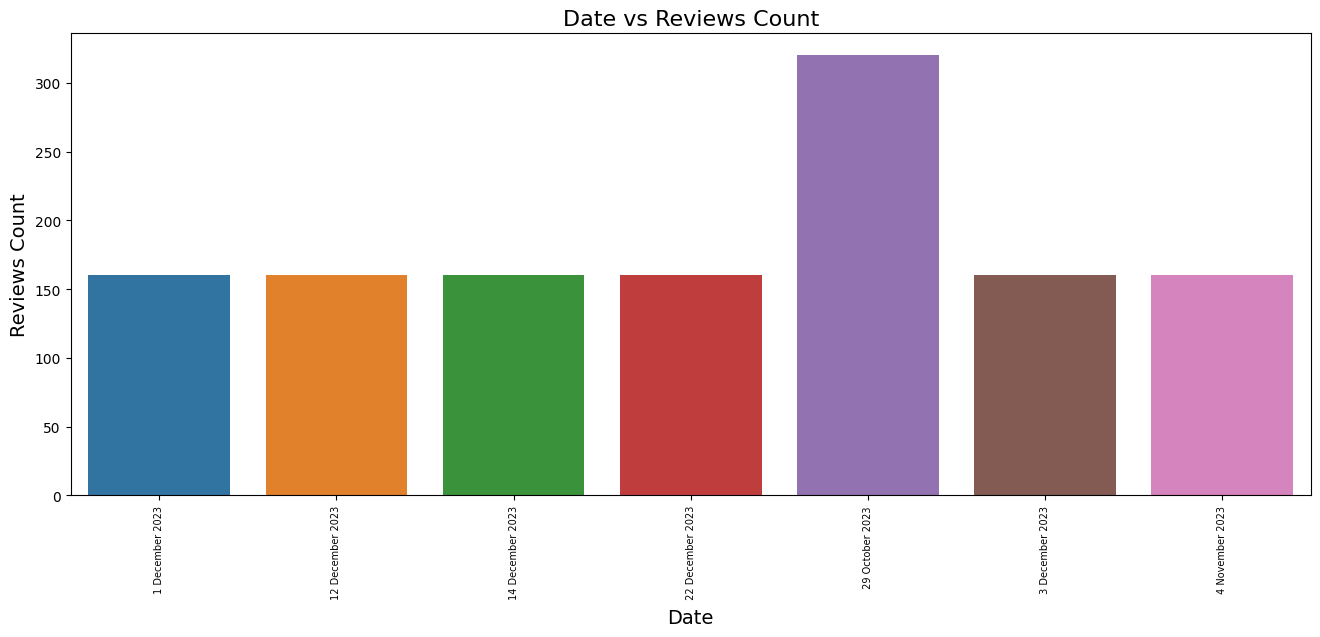

In [16]:
#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

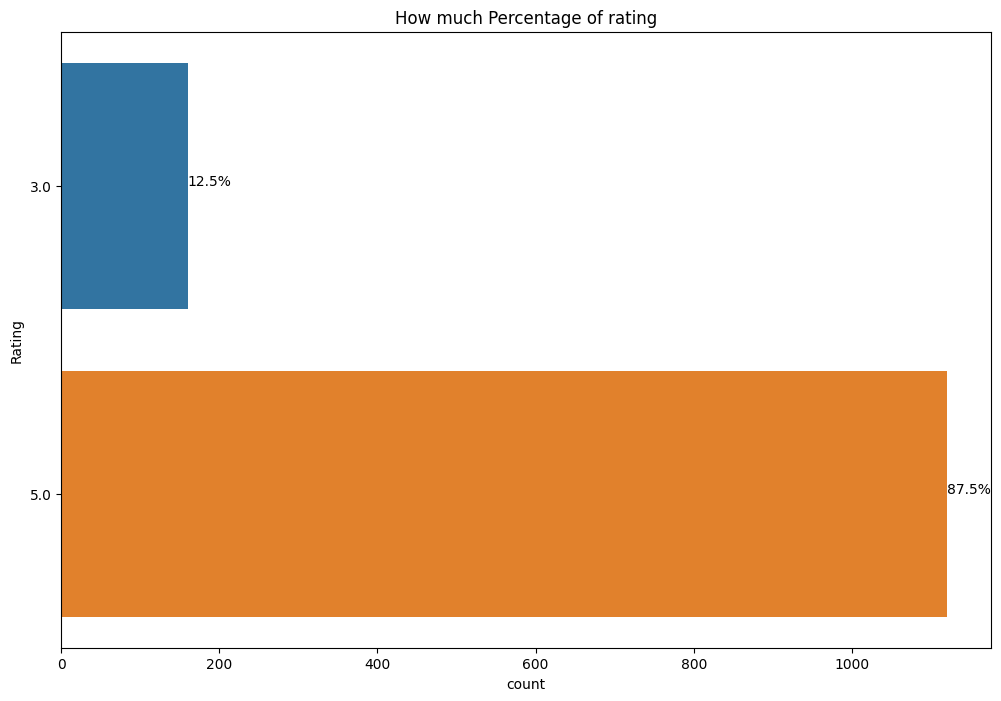

In [17]:
#Persentage Rating
plt.figure(figsize=(12,8))
plt.title('How much Percentage of rating')
ax = sns.countplot(y = 'Rating', data =Reviews)
total = len(Reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

**BasicText preprocessing for sentiment analysis**

In [18]:
from textblob import TextBlob

In [19]:
Reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The scrub actually provides a smooth texture a...
1    West for men as it is hard and not for sensiti...
2    Very good product ....in reasonable price...\n...
3    very good for removing an and dead skin Exfoli...
4                Highly recommended product\nHead more
Name: Review, dtype: object

In [20]:
boat_review = Reviews[['Review']]
boat_review

,Review
0,The scrub actually provides a smooth texture a...
1,Best for men as it is hard and not for sensiti...
2,Very good product ....in reasonable price...\n...
3,very good for removing tan and dead skin Exfol...
4,Highly recommended product\nRead more
...,...
1275,very good for removing tan and dead skin Exfol...
1276,Highly recommended product\nRead more
1277,I absolutely love this product. I regularly bu...
1278,The product was very good quality and I would ...


**Resetting Index**

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [22]:
boat_review.reset_index(drop=True, inplace=True)

In [23]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-23-3a6386b4798e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


Lemmatizer

In [24]:
import re
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-24-7d5bf4728745>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(boat_review))):


  0%|          | 0/1280 [00:00<?, ?it/s]

In [25]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
1,best men hard sensitive skin read,best men hard sensitive skin read
2,good product reasonable price read,very good product ....in reasonable price... read
3,good removing tan dead skin exfoliate skin wel...,good removing tan dead skin exfoliate skin wel...
4,highly recommended product read,highly recommended product read


**Text Pre-processing Techniques**

In [26]:
#Removing Name
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [27]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
1,best men hard sensitive skin read,best men hard sensitive skin read
2,good product reasonable price read,very good product ....in reasonable price... read
3,good removing tan dead skin exfoliate skin wel...,good removing tan dead skin exfoliate skin wel...
4,highly recommended product read,highly recommended product read
5,absolutely love product regularly instead spen...,i absolutely love product. i regularly . inste...
6,product good quality would obviously say worth...,the product good quality i would obviously say...
7,smell good exfoliated skin show result slowly ...,smells good... exfoliated skin ..shows result ...
8,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
9,best men hard sensitive skin read,best men hard sensitive skin read


In [28]:
#Removing Link
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
1,best men hard sensitive skin read,best men hard sensitive skin read
2,good product reasonable price read,very good product ....in reasonable price... read
3,good removing tan dead skin exfoliate skin wel...,good removing tan dead skin exfoliate skin wel...
4,highly recommended product read,highly recommended product read
5,absolutely love product regularly instead spen...,i absolutely love product. i regularly . inste...
6,product good quality would obviously say worth...,the product good quality i would obviously say...
7,smell good exfoliated skin show result slowly ...,smells good... exfoliated skin ..shows result ...
8,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
9,best men hard sensitive skin read,best men hard sensitive skin read


In [29]:
#Removing reviews with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
1,best men hard sensitive skin read,best men hard sensitive skin read
2,good product reasonable price read,very good product ....in reasonable price... read
3,good removing tan dead skin exfoliate skin wel...,good removing tan dead skin exfoliate skin wel...
4,highly recommended product read,highly recommended product read
5,absolutely love product regularly instead spen...,i absolutely love product. i regularly . inste...
6,product good quality would obviously say worth...,the product good quality i would obviously say...
7,smell good exfoliated skin show result slowly ...,smells good... exfoliated skin ..shows result ...
8,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
9,best men hard sensitive skin read,best men hard sensitive skin read


In [30]:
#Dropping Duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
1,best men hard sensitive skin read,best men hard sensitive skin read
2,good product reasonable price read,very good product ....in reasonable price... read
3,good removing tan dead skin exfoliate skin wel...,good removing tan dead skin exfoliate skin wel...
4,highly recommended product read,highly recommended product read
5,absolutely love product regularly instead spen...,i absolutely love product. i regularly . inste...
6,product good quality would obviously say worth...,the product good quality i would obviously say...
7,smell good exfoliated skin show result slowly ...,smells good... exfoliated skin ..shows result ...
8,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
9,best men hard sensitive skin read,best men hard sensitive skin read


In [31]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [32]:
#Function to remove emoji
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
1,best men hard sensitive skin read,best men hard sensitive skin read
2,good product reasonable price read,very good product ....in reasonable price... read
3,good removing tan dead skin exfoliate skin wel...,good removing tan dead skin exfoliate skin wel...
4,highly recommended product read,highly recommended product read
5,absolutely love product regularly instead spen...,i absolutely love product. i regularly . inste...
6,product good quality would obviously say worth...,the product good quality i would obviously say...
7,smell good exfoliated skin show result slowly ...,smells good... exfoliated skin ..shows result ...
8,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...
9,best men hard sensitive skin read,best men hard sensitive skin read


**Basic Feature Extaction**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [34]:
print(cv.get_feature_names_out()[109:200])

[]


In [35]:
print(cv.get_feature_names_out()[:100])

['absolute' 'absolutely' 'accurate' 'actually' 'also' 'amazing' 'best'
 'cake' 'cherry' 'chocolate' 'cost' 'dead' 'effective' 'exfoliate'
 'exfoliated' 'fragrance' 'free' 'give' 'good' 'hard' 'highly' 'indeed'
 'instead' 'keep' 'like' 'love' 'make' 'melted' 'men' 'mesmerised'
 'moisturizer' 'must' 'non' 'obviously' 'oily' 'price' 'product'
 'provides' 'quality' 'read' 'really' 'reasonable' 'recommended'
 'regularly' 'removing' 'result' 'say' 'scrub' 'sensitive' 'show' 'single'
 'skin' 'slowly' 'smell' 'smooth' 'soft' 'spa' 'spending' 'supposed' 'tan'
 'texture' 'usage' 'way' 'week' 'well' 'within' 'woman' 'worth' 'would'
 'young']


In [36]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]
 [0 0 0 ... 1 1 0]
 ...
 [1 1 0 ... 0 0 1]
 [0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]]


**CountVectorizer with N-grams (Bigrams & Trigrams)**

Bi-*Grams*

In [37]:
dataframe = dataframe.reset_index(drop=True)

In [38]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),     #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [39]:
top2_words = get_top_n2_words(DF["Review"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,read more,1280
1,very good,480
2,highly recommended,320
3,as it,320
4,my skin,320


[Text(0, 0, 'read more'),
 Text(1, 0, 'very good'),
 Text(2, 0, 'highly recommended'),
 Text(3, 0, 'as it'),
 Text(4, 0, 'my skin'),
 Text(5, 0, 'the scrub'),
 Text(6, 0, 'scrub actually'),
 Text(7, 0, 'actually provides'),
 Text(8, 0, 'provides smooth'),
 Text(9, 0, 'smooth texture'),
 Text(10, 0, 'texture after'),
 Text(11, 0, 'after single'),
 Text(12, 0, 'single usage'),
 Text(13, 0, 'usage the'),
 Text(14, 0, 'the cherry'),
 Text(15, 0, 'cherry of'),
 Text(16, 0, 'of the'),
 Text(17, 0, 'the cake'),
 Text(18, 0, 'cake is'),
 Text(19, 0, 'is the')]

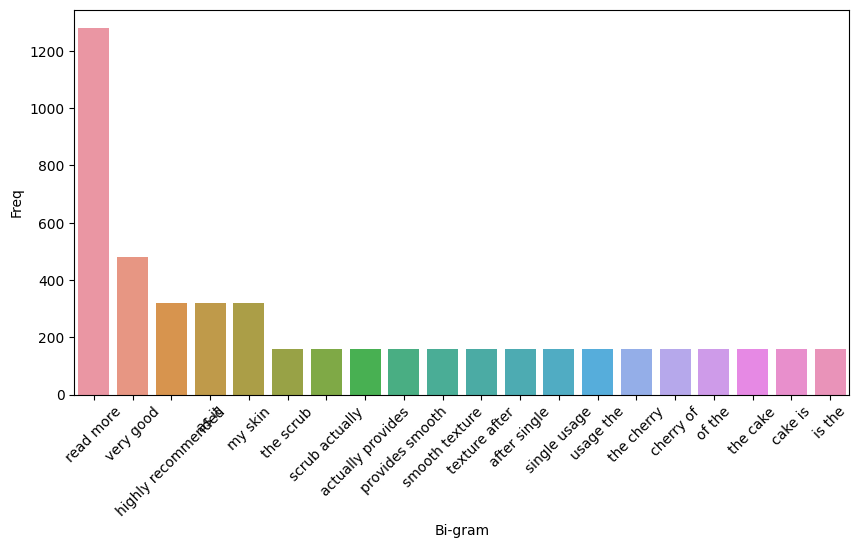

In [40]:
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


*Tri-Gram*

In [41]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [42]:
top3_words = get_top_n3_words(DF["Review"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,the scrub actually,160
1,scrub actually provides,160
2,actually provides smooth,160
3,provides smooth texture,160
4,smooth texture after,160


[Text(0, 0, 'the scrub actually'),
 Text(1, 0, 'scrub actually provides'),
 Text(2, 0, 'actually provides smooth'),
 Text(3, 0, 'provides smooth texture'),
 Text(4, 0, 'smooth texture after'),
 Text(5, 0, 'texture after single'),
 Text(6, 0, 'after single usage'),
 Text(7, 0, 'single usage the'),
 Text(8, 0, 'usage the cherry'),
 Text(9, 0, 'the cherry of'),
 Text(10, 0, 'cherry of the'),
 Text(11, 0, 'of the cake'),
 Text(12, 0, 'the cake is'),
 Text(13, 0, 'cake is the'),
 Text(14, 0, 'is the moisturizer'),
 Text(15, 0, 'the moisturizer smells'),
 Text(16, 0, 'moisturizer smells like'),
 Text(17, 0, 'smells like melted'),
 Text(18, 0, 'like melted chocolate'),
 Text(19, 0, 'melted chocolate and')]

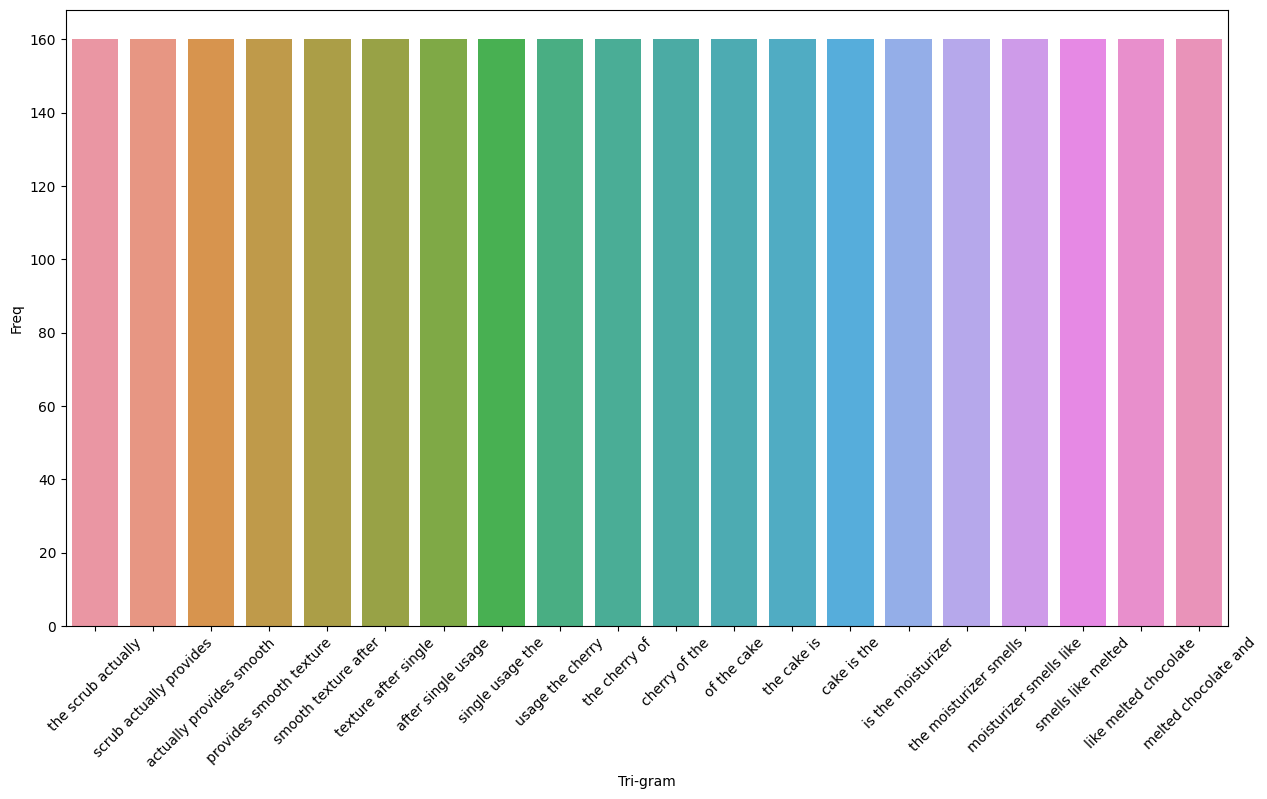

In [43]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (15, 8))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

**Word Cloud**

In [44]:
from wordcloud import WordCloud

In [45]:
string_Total = " ".join(DF["Review"])

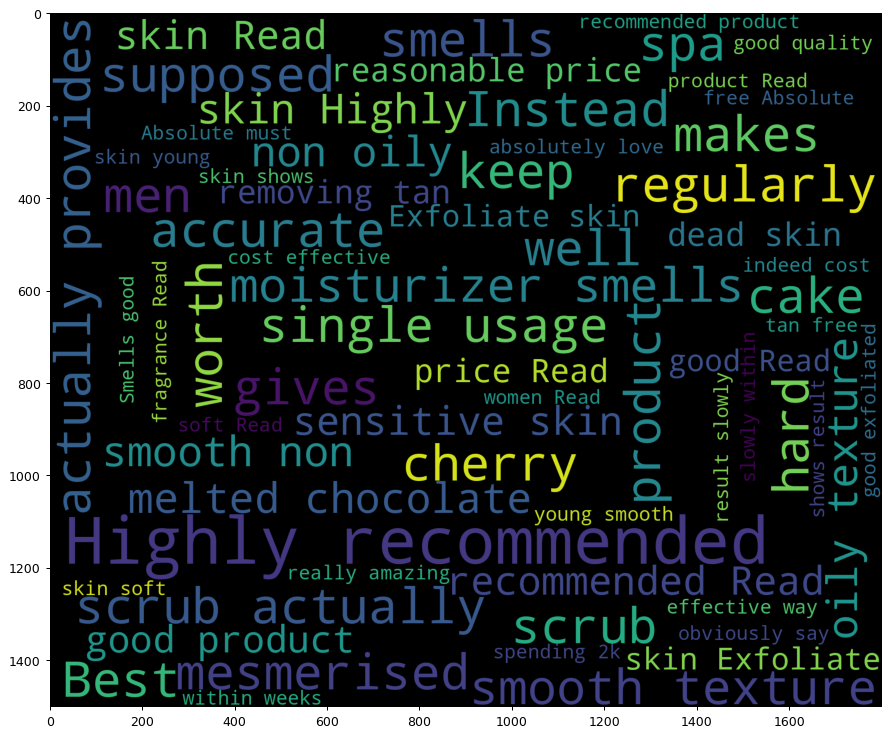

In [46]:
#wordcloud for entire corpus

wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.figure(figsize=(12,10),dpi=90)
plt.imshow(wordcloud_stw)

**Subjectivity and Polarity**

In [47]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
DF[["subjectivity", "polarity"]] = DF.apply(sentiment_analysis, axis=1)

DF

,Title,Rating,Review,Review_Date,subjectivity,polarity
0,5.0 out of 5 stars\nAmazing product!!,5.0,The scrub actually provides a smooth texture a...,12 December 2023,0.392381,0.231429
1,5.0 out of 5 stars\nCool but not for sensitive...,5.0,Best for men as it is hard and not for sensiti...,22 December 2023,0.560417,0.327083
2,5.0 out of 5 stars\nUse full,5.0,Very good product ....in reasonable price...\n...,14 December 2023,0.626667,0.536667
3,5.0 out of 5 stars\nvery good,5.0,very good for removing tan and dead skin Exfol...,1 December 2023,0.596667,0.435000
4,5.0 out of 5 stars\nAwsm,5.0,Highly recommended product\nRead more,3 December 2023,0.520000,0.330000
...,...,...,...,...,...,...
1275,5.0 out of 5 stars\nvery good,5.0,very good for removing tan and dead skin Exfol...,1 December 2023,0.596667,0.435000
1276,5.0 out of 5 stars\nAwsm,5.0,Highly recommended product\nRead more,3 December 2023,0.520000,0.330000
1277,5.0 out of 5 stars\nMakes your skin silky smooth,5.0,I absolutely love this product. I regularly bu...,4 November 2023,0.572115,0.337500
1278,5.0 out of 5 stars\nWorth it,5.0,The product was very good quality and I would ...,29 October 2023,0.556000,0.462000


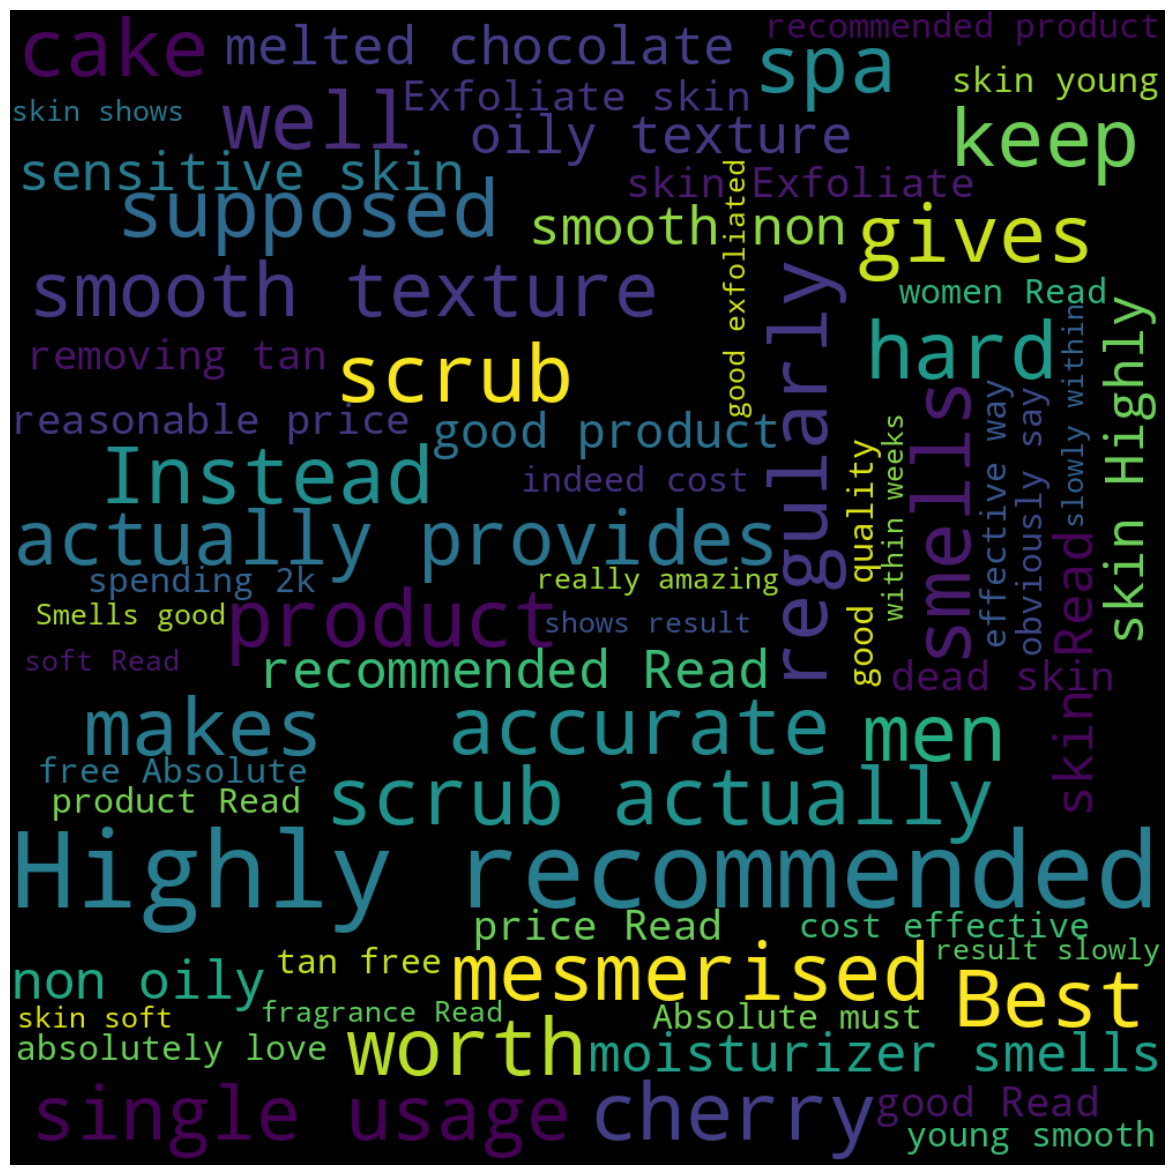

In [48]:
#Word-Cloud

allwords = " ".join([twts for twts in DF["Review"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [49]:
# Compute The Negative, Neutral, Positive Analysis

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
DF["analysis"] = DF["polarity"].apply(analysis)

In [50]:
positive_Review = DF[DF['analysis'] == 'Positive']
negative_Review = DF[DF['analysis'] == 'Negative']

print('positive Review')
for i, row in positive_Review[:5].iterrows():
  print(' -' + row['Review'])

print('negative Review')
for i, row in negative_Review[:5].iterrows():
  print(' -' + row['Review'])

positive Review
 -The scrub actually provides a smooth texture after single usage. The cherry of the cake is the moisturizer, smells like melted chocolate and gives a smooth, non- oily texture on skin. Highly recommended.
Read more
 -Best for men as it is hard and not for sensitive skin
Read more
 -Very good product ....in reasonable price...
Read more
 -very good for removing tan and dead skin Exfoliate skin very well and smells so good  :)
Read more
 -Highly recommended product
Read more
negative Review


**Sentiment Analysis Graph**

Subjectivity and polarity

In [51]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,scrub actually provides smooth texture single ...,the scrub actually provides smooth texture sin...,0.370857,0.177714
1,best men hard sensitive skin read,best men hard sensitive skin read,0.580556,0.269444
2,good product reasonable price read,very good product ....in reasonable price... read,0.600000,0.450000
3,good removing tan dead skin exfoliate skin wel...,good removing tan dead skin exfoliate skin wel...,0.533333,0.400000
4,highly recommended product read,highly recommended product read,0.540000,0.160000


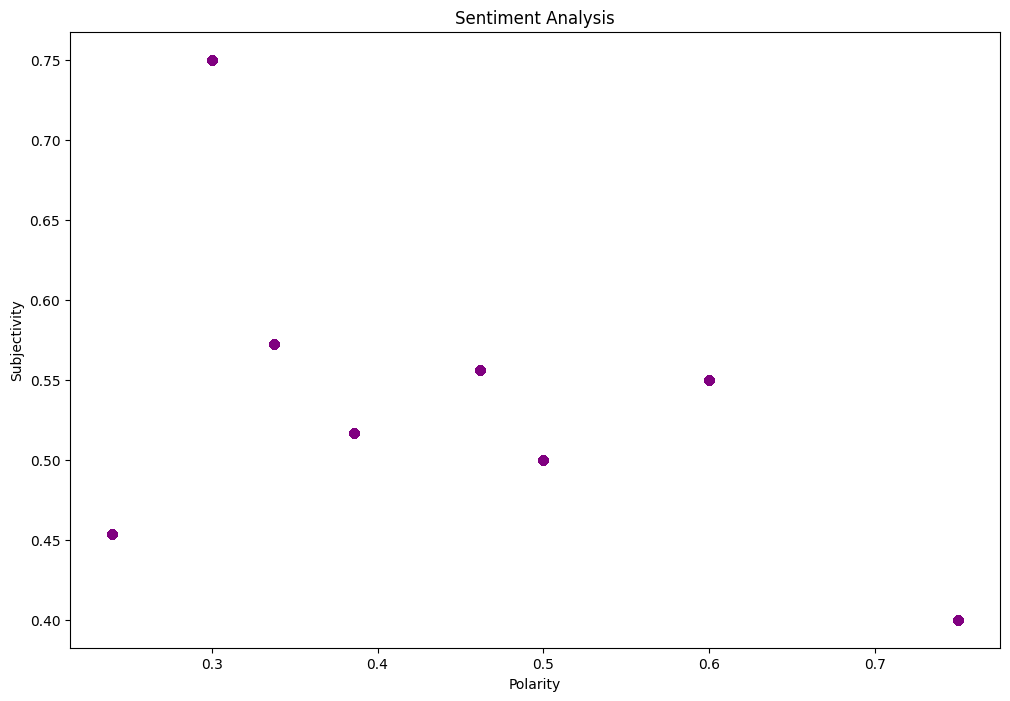

In [ ]:
plt.figure(figsize=(12, 8))

for i in range(0, DF.shape[0]):
    plt.scatter(DF["polarity"][i], DF["subjectivity"][i], color = "purple")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [52]:
#Most common words in positive Review
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


**Fetch sentiments Using TextBlob**

In [53]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [54]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,1280


All Reviews are Positive

**Most common words in positive Review**

In [55]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

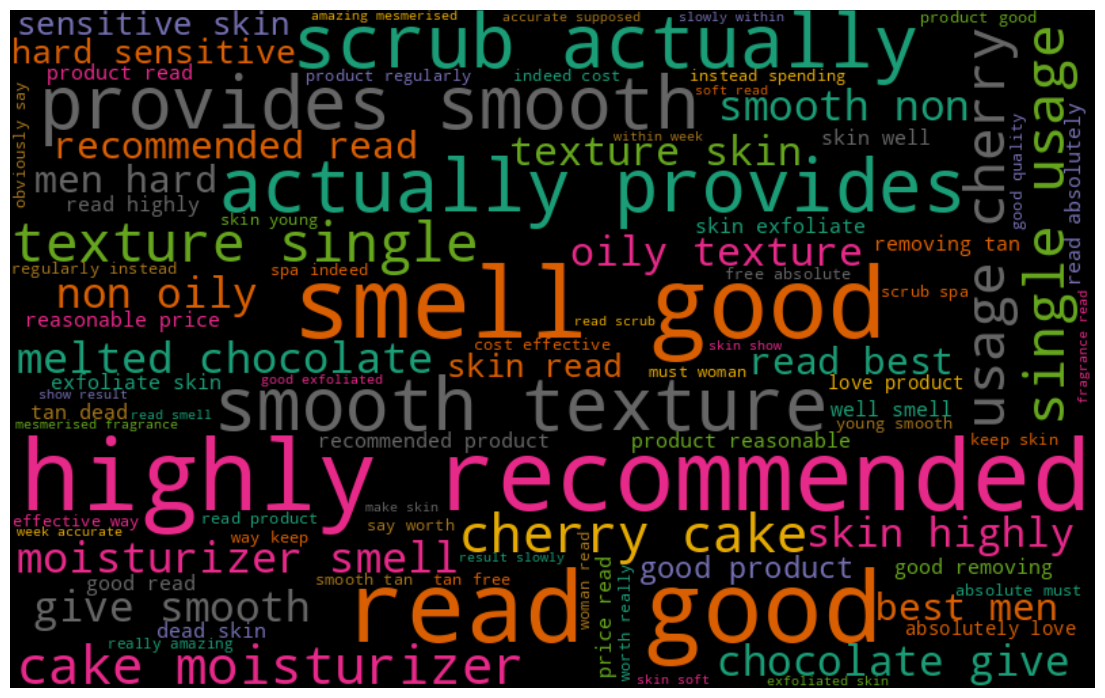

In [56]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews']])
generate_wordcloud(all_words) #No Negative Review so we cant dictate negative word review